In [1]:
import jax
from jax import grad
import jax.numpy as jnp
import jax.scipy.stats as stats
import jax.random as random
from tqdm import tqdm
import matplotlib.pyplot as plt
from jax.example_libraries import optimizers

In [2]:
key = random.PRNGKey(42)

CUDA backend failed to initialize: Found CUDA version 12010, but JAX was built against version 12020, which is newer. The copy of CUDA that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
def gen_data(key, *, n_samples=100, sigma=0.01, mu_x=0):
    w, b = 2, -10

    key_, subk = random.split(key)
    x = random.normal(subk, (n_samples, 1)) * sigma + mu_x
    key_, subk = random.split(key_)
    y = random.normal(subk, (n_samples, 1)) * sigma + w*x + b

    return x, y

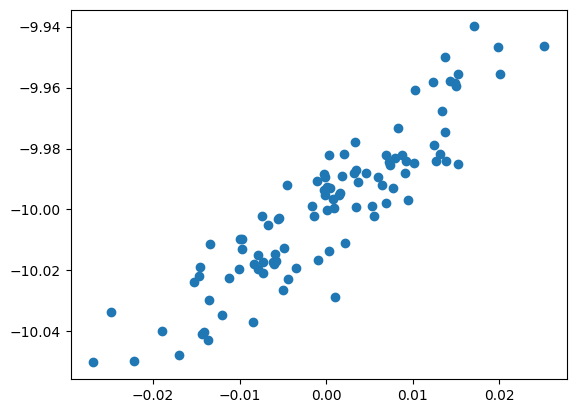

In [4]:
x, y = gen_data(key)
plt.scatter(x, y)

In [5]:
def f(w, x):
    x = jnp.hstack([jnp.ones((x.shape[0], 1)), x])
    w = w.reshape(1, -1)
    return x @ w.T

In [6]:
f(jnp.array([1., 2.]), x).shape

(100, 1)

In [7]:
def loss(w, x, y):
    y_hat = f(w, x)
    return ((y_hat - y)**2).mean()

In [42]:
def optimize(w, x, y):
    l = loss(w, x, y)
    loss_trace = []

    for i in tqdm(range(1000)):
        loss_trace.append(l)
        if l <= 0.0001:
            print('Stopping early:')
            break
        w -= 0.01 * grad(loss)(w, x, y)
        l = loss(w, x, y)
    
    return w, loss_trace

100%|██████████| 1000/1000 [00:05<00:00, 189.22it/s]


[-9.998731   -0.24204703]


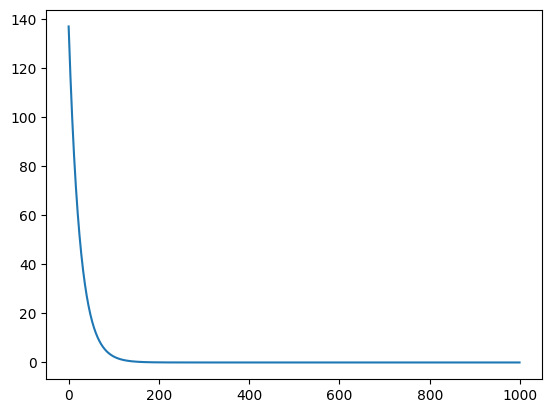

In [43]:
key_, subk = random.split(key)
w_init = random.normal(subk, (2,))

w, loss_trace = optimize(w_init, x, y)
print(w)
plt.plot(loss_trace)

(50, 2)


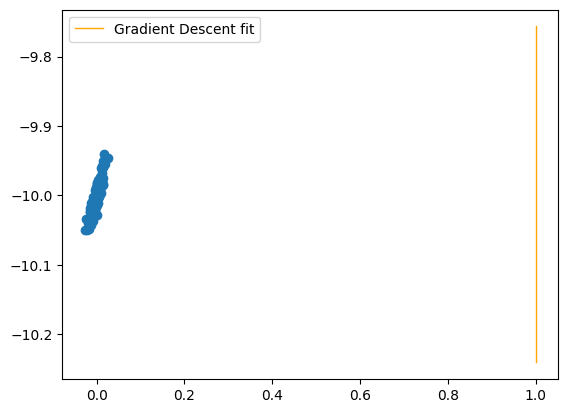

In [48]:
plt.scatter(x[:, 0], y)

xs = jnp.linspace(-1, 1)
xs = jnp.stack([jnp.ones_like(xs), xs], axis=1)
print(xs.shape)
ys_fit = xs@w.T
plt.plot(xs[:, 0], ys_fit, color='orange', lw=1, label='Gradient Descent fit')
plt.legend()

In [ ]:
opt_init, opt_update, get_params = optimizers.rmsprop(0.1)
opt_state = opt_init(random.normal(subk, (2,)))

for i in range(1000):
    w = get_params(opt_state)
    opt_state = opt_update(t, )